# Quantum DataSet

The quantum dataset is a collection of measurements on quantum devices. Using Python one can easily download the collection
and analyse some of the datasets in the collection.

* Installation: `pip install quantum_dataset`
* For more information see: https://github.com/QuTech-Delft/quantum_dataset

Pieter Eendebak <pieter.eendebak@tno.nl>

In [1]:
import os
import tempfile
import webbrowser
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from quantumdataset import QuantumDataset

First we create the QuantumDataset object. If the data is not available at the specified location, the latest data is downloaded automatically. 

In [2]:
dataset_location = Path(tempfile.mkdtemp(prefix="quantum-dataset-"))

quantum_dataset = QuantumDataset(data_directory=dataset_location)
quantum_dataset.show_data()

downloading Quantum Dataset from https://github.com/QuTech-Delft/quantum_dataset/releases/download/Test/QuantumDataset-0.2.zip to C:\Users\EENDEB~1\AppData\Local\Temp\quantum-dataset-x9t1pvce
   extracting data...
tag addition_line_scan: 2 results
tag allxy: 3 results
tag anticrossing: 22 results
tag bias_triangles: 1 results
tag coulomb: 8 results
tag elzerman_detuning_scan: 3 results
tag elzerman_traces: 1 results
tag flipping: 2 results
tag frequency_rabi: 3 results
tag phase_experiment: 4 results
tag photo_assisted_tunneling: 1 results
tag pinchoff: 1 results
tag pol_fitting: 6 results
tag resonance_scan: 1 results
tag rts: 5 results
tag time_rabi: 3 results
tag time_ramsey: 3 results


Load a dataset from the database

In [3]:
subtags = quantum_dataset.list_subtags("allxy")
print(f"datasets for allxy: {subtags}")

dataset = quantum_dataset.load_dataset("allxy", subtags[0])
dataset = quantum_dataset.load_dataset("allxy", subtags[0])
print(dataset)

datasets for allxy: ['2019-11-05_14-34-35_qtt_allxy.json', '2019-11-05_14-34-37_qtt_allxy.json', '2019-11-05_14-34-39_qtt_allxy.json']
<xarray.Dataset>
Dimensions:  (index: 21)
Coordinates:
  * index    (index) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Data variables:
    allxy    (index) float64 0.12 0.1653 0.136 0.1707 ... 0.7893 0.788 0.7933


For many of the datasets in the database there already exist dedicated analysis methods. We can apply the methods, and create an overview page.


tag time_rabi: 3 result(s)


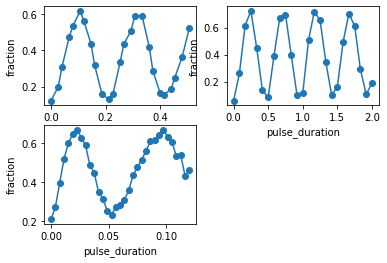

In [4]:
quantum_dataset.show("time_rabi", fig=1)

## Generate an overview page

In [ ]:
htmldir = Path(dataset_location) / "html"
quantum_dataset.generate_overview_page(htmldir)  # , plot_functions=analysis_functions)

# to open the webpage, run the following commented line
# webbrowser.open(os.path.join(htmldir, "index.html"), new=1)

generate_results_page: tag addition_line_scan
  generate_results_page addition_line_scan: 0/2: name addition_line_scan_0000
  generate_results_page addition_line_scan: 1/2: name addition_line_scan_0004
generate_results_page: tag allxy
  generate_results_page allxy: 0/3: name 2019-11-05_14-34-35_qtt_allxy.json
  generate_results_page allxy: 1/3: name 2019-11-05_14-34-37_qtt_allxy.json
  generate_results_page allxy: 2/3: name 2019-11-05_14-34-39_qtt_allxy.json
generate_results_page: tag anticrossing
  generate_results_page anticrossing: 0/22: name 2017-12-22_14-27-28_qtt_scan2Dturbo_P2_P3.json
  generate_results_page anticrossing: 1/22: name 2017-12-22_14-55-58_qtt_scan2Dturbo_P2_P3.json
  generate_results_page anticrossing: 2/22: name 2017-12-22_16-29-19_qtt_scan2Dturbo_P2_P3.json
  generate_results_page anticrossing: 3/22: name 2018-01-02_10-47-41_qtt_videomode_2d_single.json
  generate_results_page anticrossing: 4/22: name 2018-01-07_22-35-15_qtt_videomode_2d_single.json
  generate_re

Generate a single results page

In [ ]:
filename = os.path.join(htmldir, "testpage.html")
page = quantum_dataset.generate_results_page("pol_fitting", htmldir, filename)

To save additional data, one can use the method `save_dataset`.

In [9]:
plt.close("all")